<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 0s 0us/step


In [10]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [48]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 46
max_features = len(word_index.values())
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')
# TODO - your code!
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(set(y_train)), activation='softmax'))  
                   # allow output to choose from range of values in the 'set'
                   # of y_train classification values. Activation is 'softmax'
                   # because it works best for multiple, categorical values 

print(len(set(y_train)))
y_train[0]

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...
46


19

In [39]:
# You should only run this cell once your model has been properly configured

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test))

score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 8982 samples, validate on 2246 samples
2246/2246 [==============================] - 4s 2ms/sample - loss: 1.8068 - acc: 0.5160
Test score: 1.8067994368256783
Test accuracy: 0.5160285


## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

Transforms the sequences to the length prepared for the neural network. It is a necessary step to allow the inputs to fit the NN.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

RNNs suffer from vanishing or exploding gradients which may produce weights that either never converge or never change. LSTMs solves this issue by biasing recent values while retaining weights to later values.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

RNN / LSTM are used for sequential data where order of input data matters. So cases such as finance, language text, genetics, or other general time-series related data.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [54]:
!pip install google_images_download

In [56]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "lily frog ponds", "limit": 5, "print_urls": True}
                      # I had weird error for keywords = "lily frog pond" ??
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = lily frog ponds
Evaluating...
Starting Download...
Image URL: https://www.welcomewildlife.com/wp-content/uploads/2015/01/Frog-on-lily-pad.jpg
Completed Image ====> 1.Frog-on-lily-pad.jpg
Image URL: http://www.slrobertson.com/images/usa/georgia/atlanta/atl-botanical-gardens/frog-lily-pond-2-b.jpg
Completed Image ====> 2.frog-lily-pond-2-b.jpg
Image URL: https://s3.amazonaws.com/assets.cce.cornell.edu/slides/22607/image/sized/Ponds5.jpg?1437948296
Completed Image ====> 3.Ponds5.jpg
Image URL: https://cdn.pixabay.com/photo/2018/07/29/16/11/water-lilies-3570439_960_720.jpg
Completed Image ====> 4.water-lilies-3570439_960_720.jpg
Image URL: https://c8.alamy.com/comp/C63A4K/green-frog-floating-on-a-water-lily-pad-leaf-in-a-pond-with-pink-flowers-C63A4K.jpg
Completed Image ====> 5.green-frog-floating-on-a-water-lily-pad-leaf-in-a-pond-with-pink-flowers-C63A4K.jpg

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals* 
- Check for fish or other labels
- Create a matplotlib visualizations of the images and your prediction as the visualization label

In [0]:
# You've got something to do in this cell. ;)

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a boolean (True/False) if a frog is in the image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=8)[0]
    print(results)
    for entry in results:
      if (entry[1] == 'bullfrog') or (entry[1] == 'tree frog') or (entry[1] == 'tailed frog'):
        if(entry[2]>0.5):
          return True
    return False

            
    return None

In [117]:
absolute_image_paths

({'lily frog ponds': ['/content/downloads/lily frog ponds/1.Frog-on-lily-pad.jpg',
   '/content/downloads/lily frog ponds/2.frog-lily-pond-2-b.jpg',
   '/content/downloads/lily frog ponds/3.Ponds5.jpg',
   '/content/downloads/lily frog ponds/4.water-lilies-3570439_960_720.jpg',
   '/content/downloads/lily frog ponds/5.green-frog-floating-on-a-water-lily-pad-leaf-in-a-pond-with-pink-flowers-C63A4K.jpg']},
 0)

In [0]:
from IPython.display import Image

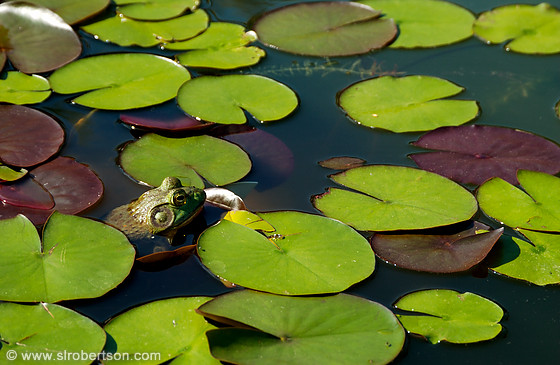

In [119]:
Image(filename='/content/downloads/lily frog ponds/2.frog-lily-pond-2-b.jpg', width=600)

In [120]:
img_contains_frog(process_img_path('/content/downloads/lily frog ponds/2.frog-lily-pond-2-b.jpg'))

[('n03991062', 'pot', 0.7243723), ('n01641577', 'bullfrog', 0.045519695), ('n01667778', 'terrapin', 0.04263503), ('n02877765', 'bottlecap', 0.0326819), ('n01737021', 'water_snake', 0.020111015), ('n04409515', 'tennis_ball', 0.018943807), ('n07753113', 'fig', 0.016971406), ('n12620546', 'hip', 0.012854)]


False

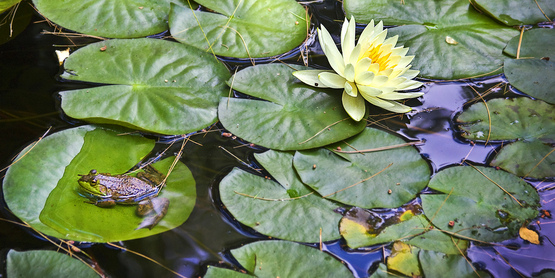

In [121]:
Image(filename='/content/downloads/lily frog ponds/3.Ponds5.jpg', width=600)

In [122]:
img_contains_frog(process_img_path('/content/downloads/lily frog ponds/3.Ponds5.jpg'))

[('n03991062', 'pot', 0.15060301), ('n12620546', 'hip', 0.091648564), ('n01773797', 'garden_spider', 0.06739495), ('n04275548', 'spider_web', 0.061766338), ('n02219486', 'ant', 0.058191434), ('n02168699', 'long-horned_beetle', 0.040875237), ('n02167151', 'ground_beetle', 0.03571582), ('n02169497', 'leaf_beetle', 0.031020679)]


False

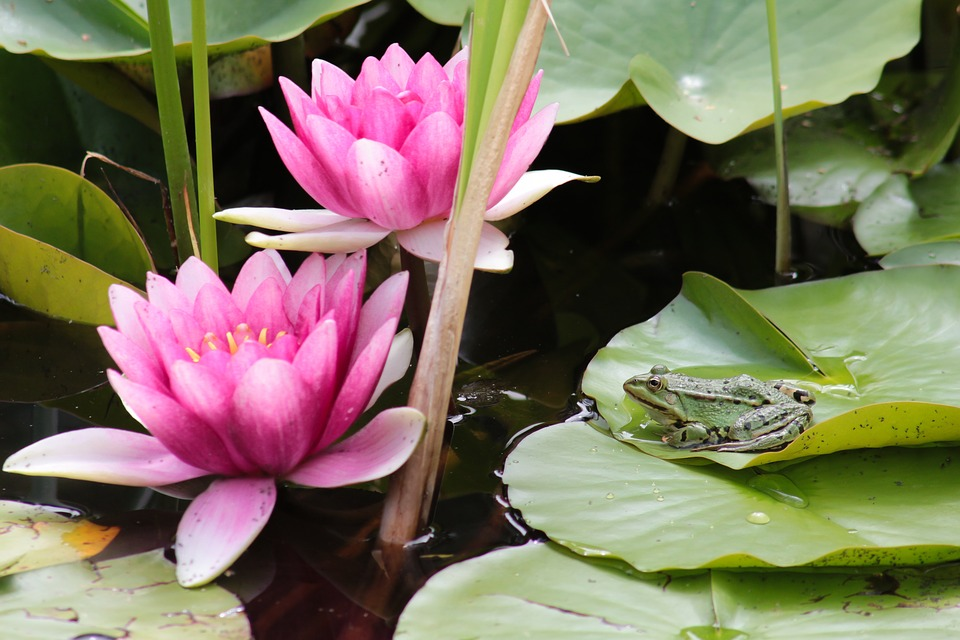

In [123]:
Image(filename='/content/downloads/lily frog ponds/4.water-lilies-3570439_960_720.jpg', width=600)

In [124]:
img_contains_frog(process_img_path('/content/downloads/lily frog ponds/4.water-lilies-3570439_960_720.jpg'))

[('n02206856', 'bee', 0.28439334), ('n11939491', 'daisy', 0.10707288), ('n01943899', 'conch', 0.07492884), ('n04522168', 'vase', 0.07314497), ('n03991062', 'pot', 0.06356115), ('n07718472', 'cucumber', 0.05385477), ('n07753592', 'banana', 0.04851635), ('n02280649', 'cabbage_butterfly', 0.037690856)]


False

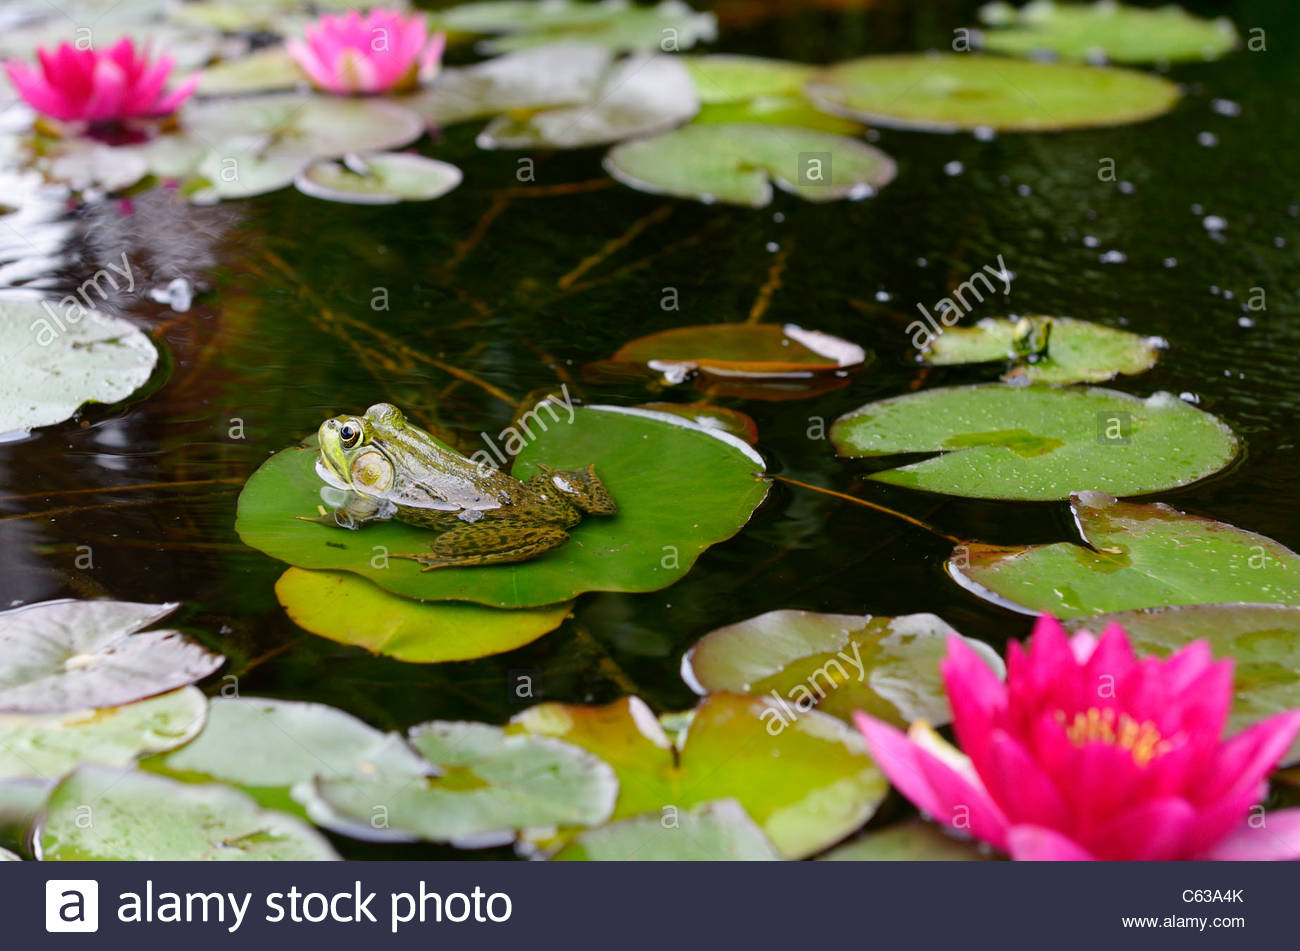

In [125]:
Image(filename='/content/downloads/lily frog ponds/5.green-frog-floating-on-a-water-lily-pad-leaf-in-a-pond-with-pink-flowers-C63A4K.jpg', width=600)

In [126]:
img_contains_frog(process_img_path('/content/downloads/lily frog ponds/5.green-frog-floating-on-a-water-lily-pad-leaf-in-a-pond-with-pink-flowers-C63A4K.jpg'))

[('n01641577', 'bullfrog', 0.8010629), ('n01737021', 'water_snake', 0.14023371), ('n01698640', 'American_alligator', 0.010686599), ('n02017213', 'European_gallinule', 0.0069641233), ('n01667778', 'terrapin', 0.0062900796), ('n02280649', 'cabbage_butterfly', 0.003159887), ('n01667114', 'mud_turtle', 0.002846564), ('n02013706', 'limpkin', 0.0026645937)]


True

#### Stretch Goal: Displaying Predictions

In [0]:
import matplotlib.pyplot as plt



<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ Autoencoders may be used to reduce dimensionality of an image to be used for reverse image search. In more detail, the autoencoder may take any image and turn it into a much smaller array of numbers which may then be compared to a database of other encoded images to return the source of that orginal image.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

The scientific mode of thinking. Understanding and exploring the validity of a scientific statement.

- What area of Data Science would you most like to learn more about, and why?

A deeper application of statistical methods for scientific inference.

- Where do you think Data Science will be in 5 years?

Most likely just a broader application and integration of techniques. 

- What are the threats posed by AI to our society?

Poor understanding of knowing what to optimize may lead application into chaotic realms.

- How do you think we can counteract those threats? 

Constantly revisit the goal and methods of the optimization process.

- Do you think achieving General Artifical Intelligence is ever possible?

Probably through human integration with AI.

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [127]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")